<a href="https://colab.research.google.com/github/saloni1901/Diabetes_project/blob/master/daibetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install catboost


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
dataset=pd.read_csv('diabetes.csv')
dataset.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
dataset['Outcome'].unique()

array([1, 0])

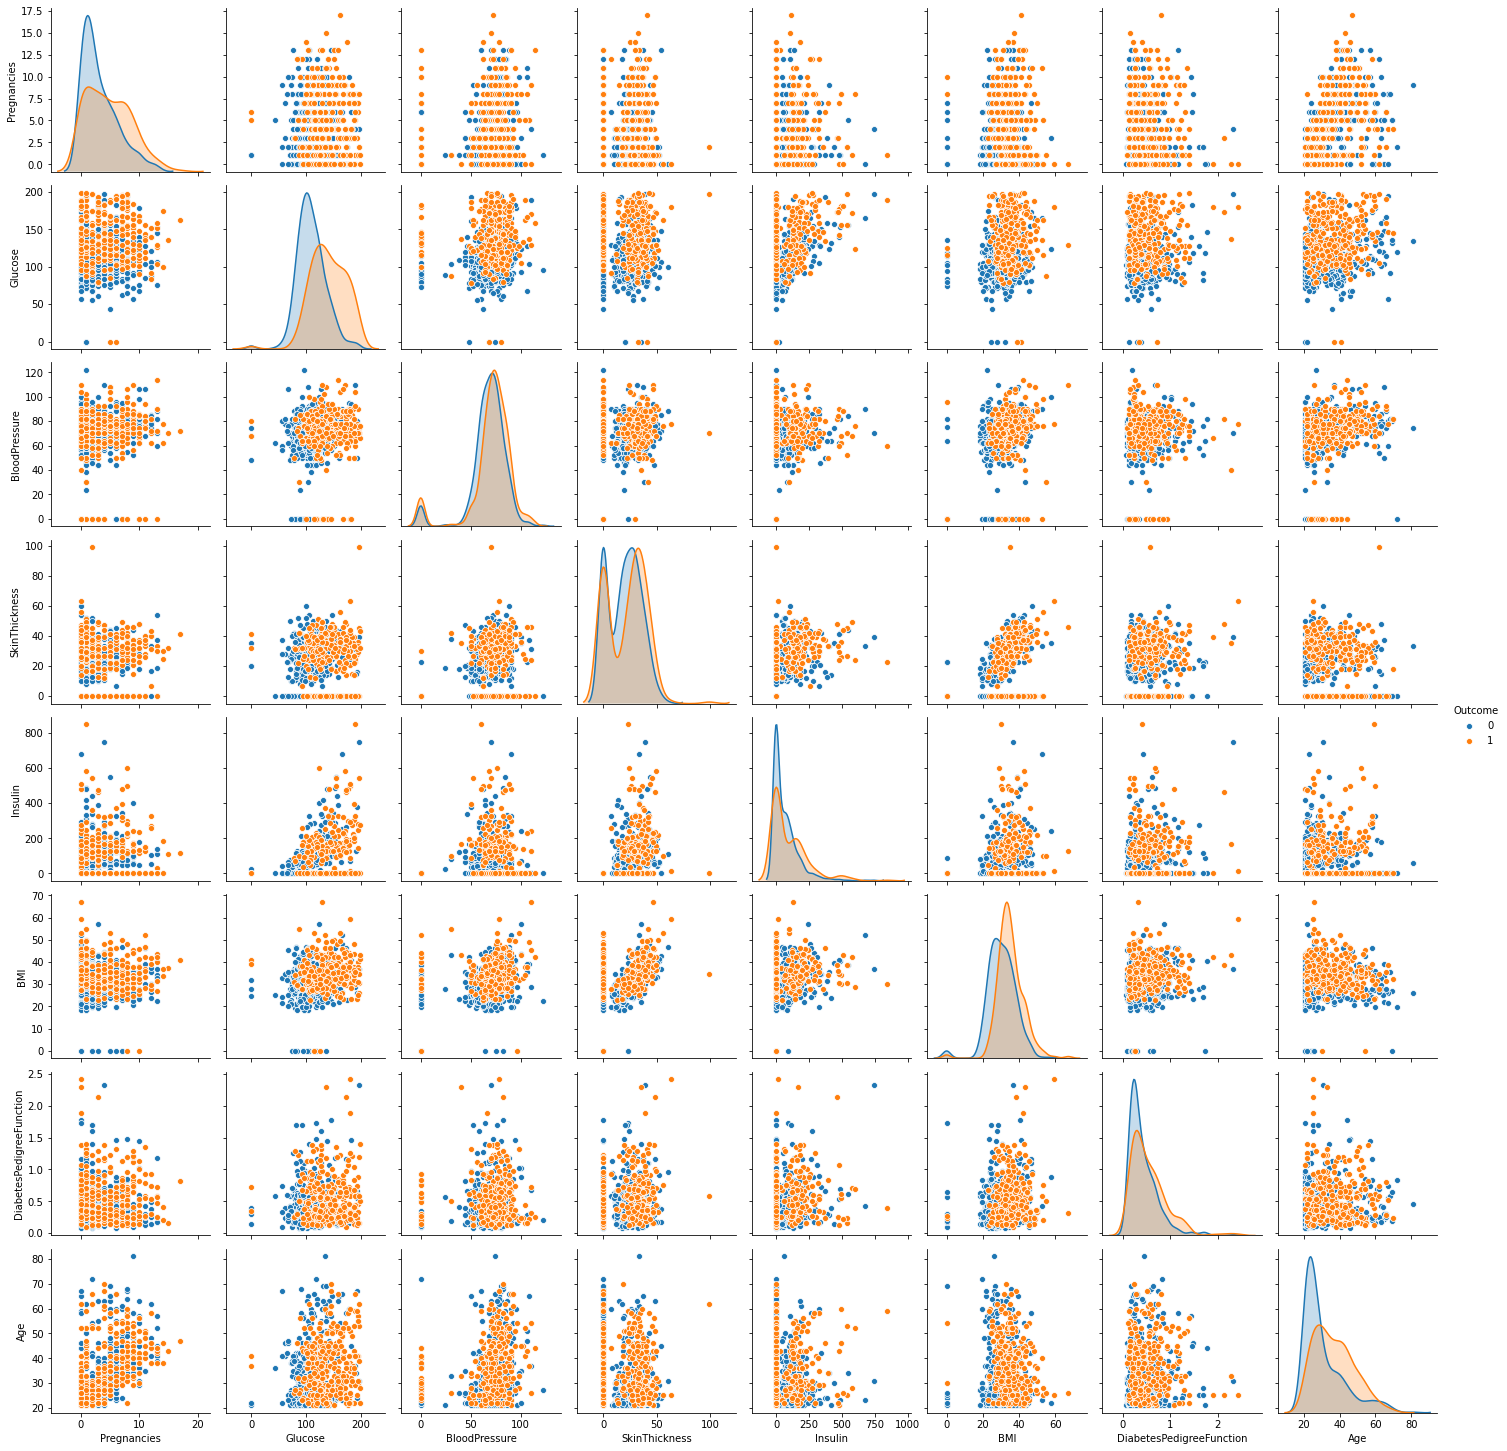

In [ ]:
sns.pairplot(dataset,hue='Outcome')
plt.show()


In [ ]:
dataset.columns
from sklearn.model_selection import KFold

In [ ]:
dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].median()

Pregnancies        3.0
Glucose          117.0
BloodPressure     72.0
SkinThickness     23.0
Insulin           30.5
BMI               32.0
dtype: float64

In [ ]:
dataset[dataset['Pregnancies']==0].shape

(111, 9)

In [ ]:
dataset[dataset['Glucose']==0].shape

(5, 9)

In [ ]:
dataset[dataset['BloodPressure']==0].shape

(35, 9)

In [ ]:
dataset[dataset['SkinThickness']==0].shape

(227, 9)

In [ ]:
dataset[dataset['Insulin']==0].shape

(374, 9)

In [ ]:
dataset[dataset['BMI']==0].shape

(11, 9)

In [ ]:
dataset[['Pregnancies', 'Insulin', 'Glucose','BloodPressure', 'SkinThickness',
       'BMI']] = dataset[['Pregnancies',  'Insulin', 'Glucose','BloodPressure', 'SkinThickness',
       'BMI']].apply(lambda x: x.replace(0,x.median()))



In [ ]:
dataset.iloc[:,:-1] = dataset.iloc[:,:-1].astype('float64')

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
print(X)


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.30,random_state=42)

In [ ]:
X_train


array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  3.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  3.   , 141.   ,  72.   , ...,  42.4  ,   0.205,  29.   ],
       [  3.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

linear=LogisticRegression(C=0.01)
linear.fit(X_train,y_train)
y_pred1=linear.predict(X_test)
y_pred1=y_pred1.reshape(len(y_pred1),1)
y_test=y_test.reshape(len(y_test),1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
np.concatenate((y_test,y_pred1),1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [0,

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred1)

array([[127,  24],
       [ 32,  48]])

In [ ]:
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.7575757575757576
0.6666666666666666
0.631578947368421
0.6
[[127  24]
 [ 32  48]]


0.7205298013245033

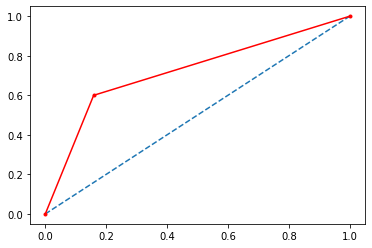

In [ ]:
k1=linear.predict_proba(X_test)
k1=k1[:,1]
auc = roc_auc_score(y_test, y_pred1)
a,b, _ = roc_curve(y_test,y_pred1)
plt.plot([0,1],linestyle='--')
plt.plot(a,b,marker=".",color="red")
auc


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=8)
kn.fit(X_train,y_train)
y_pred2=kn.predict(X_test)
y_pred2

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred2)

array([[121,  30],
       [ 38,  42]])

In [ ]:
accuracy_score(y_test,y_pred2)

0.7056277056277056

In [ ]:
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.7056277056277056
0.5833333333333334
0.5526315789473685
0.525
[[121  30]
 [ 38  42]]


0.663162251655629

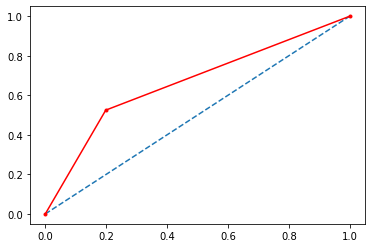

In [ ]:
k2=kn.predict_proba(X_test)
k2=k2[:,1]
auc = roc_auc_score(y_test, y_pred2)
a,b, _ = roc_curve(y_test,y_pred2)
plt.plot([0,1],linestyle='--')
plt.plot(a,b,marker=".",color="red")
auc


In [ ]:

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 45)
classifier.fit(X_train, y_train)
y_pred3=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred3)


array([[132,  19],
       [ 41,  39]])

In [ ]:
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.7402597402597403
0.6724137931034483
0.5652173913043478
0.4875
[[132  19]
 [ 41  39]]


In [ ]:
#k3=classifier.predict_proba(X_test)
#k3=k3[:,1]
##auc = roc_auc_score(y_test, y_pred3)
#a,b, _ = roc_curve(y_test,y_pred3)
#plt.plot([0,1],linestyle='--')
#plt.plot(a,b,marker=".",color="red")

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(X_train,y_train)
y_pred4=naive.predict(X_test)
y_pred4

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:

from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))
print(f1_score(y_test,y_pred4))
print(recall_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))


0.7402597402597403
0.6190476190476191
0.6341463414634146
0.65
[[119  32]
 [ 28  52]]


0.7190397350993377

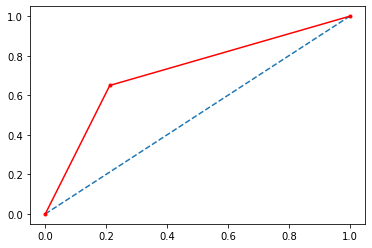

In [ ]:
k4=naive.predict_proba(X_test)
k4=k4[:,1]
auc = roc_auc_score(y_test, y_pred4)
a,b, _ = roc_curve(y_test,y_pred4)
plt.plot([0,1],linestyle='--')
plt.plot(a,b,marker=".",color="red")
auc

In [ ]:
from sklearn.tree import DecisionTreeClassifier
t=DecisionTreeClassifier(criterion='entropy',random_state=0)
t.fit(X_train,y_train)
y_pred5=t.predict(X_test)
y_pred5

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:

from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred5)

array([[115,  36],
       [ 30,  50]])

In [ ]:

print(accuracy_score(y_test,y_pred5))
print(precision_score(y_test,y_pred5))
print(f1_score(y_test,y_pred5))
print(recall_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

0.7142857142857143
0.5813953488372093
0.6024096385542168
0.625
[[115  36]
 [ 30  50]]


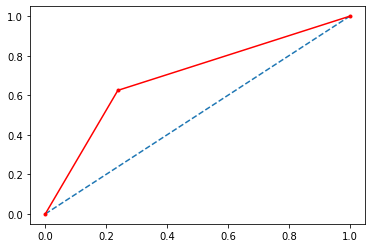

In [ ]:
k5=t.predict_proba(X_test)
k5=k5[:,1]
auc = roc_auc_score(y_test, y_pred5)
a,b, _ = roc_curve(y_test,y_pred5)
plt.plot([0,1],linestyle='--')
plt.plot(a,b,marker=".",color="red")

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [ ]:
random=RandomForestClassifier(criterion='entropy',random_state=1)
random.fit(X_train,y_train)
y_pred6=random.predict(X_test)
y_pred6

print(accuracy_score(y_test,y_pred6))

0.7878787878787878


In [ ]:

confusion_matrix(y_test,y_pred6)


array([[126,  25],
       [ 24,  56]])

0.7878787878787878
0.691358024691358
0.6956521739130435
0.7


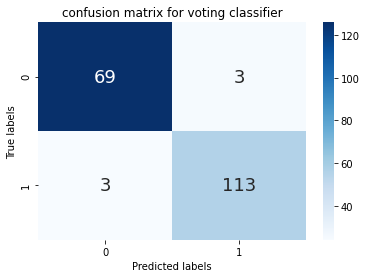

In [ ]:

print(accuracy_score(y_test,y_pred6))
print(precision_score(y_test,y_pred6))
print(f1_score(y_test,y_pred6))
print(recall_score(y_test,y_pred6))
p=confusion_matrix(y_test,y_pred6)

labels = ['69','3','3','113']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(p,annot=labels,annot_kws={"size":18}, fmt="", cmap='Blues')

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("confusion matrix for voting classifier")
plt.show()


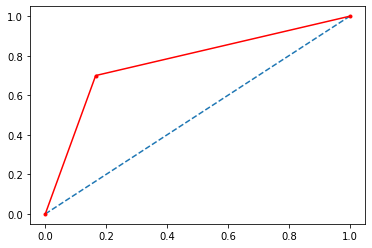

In [ ]:
k6=random.predict_proba(X_test)
k6=k6[:,1]
auc = roc_auc_score(y_test, y_pred6)
a,b, _ = roc_curve(y_test,y_pred6)
plt.plot([0,1],linestyle='--')
plt.plot(a,b,marker=".",color="red")

In [ ]:
from sklearn.ensemble import VotingClassifier
model1=LogisticRegression(random_state=1)

model3=GaussianNB()
model4=RandomForestClassifier(n_estimators=90,random_state=1)

model5 = VotingClassifier(estimators=[('rf',model4),('nb',model3)], voting='soft')
model5.fit(X_train,y_train)
tt=model5.predict(X_test)
accuracy_score(y_test,tt)

0.7359307359307359

0.7359307359307359
0.6144578313253012
0.6257668711656442
0.6375
[[119  32]
 [ 29  51]]


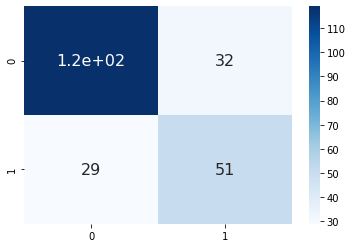

In [ ]:
import seaborn as sns
print(accuracy_score(y_test,tt))
print(precision_score(y_test,tt))
print(f1_score(y_test,tt))
print(recall_score(y_test,tt))
print(confusion_matrix(y_test,tt))
from sklearn.metrics import plot_confusion_matrix
t=confusion_matrix(y_test,tt)
sns.heatmap(t, annot=True, annot_kws={"size": 16},cmap='Blues')
plt.show()

In [ ]:
ttt=AdaBoostClassifier(n_estimators=30, learning_rate=.1, algorithm='SAMME.R', random_state=1)
ttt.fit(X_train,y_train)
y_pred=ttt.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

In [ ]:

print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7532467532467533
0.6825396825396826
0.6013986013986015
0.5375
[[131  20]
 [ 37  43]]


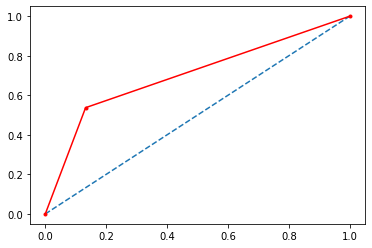

In [ ]:
k8=ttt.predict_proba(X_test)
k8=k8[:,1]
auc = roc_auc_score(y_test, y_pred)
a,b, _ = roc_curve(y_test,y_pred)
plt.plot([0,1],linestyle='--')
plt.plot(a,b,marker=".",color="red")

In [ ]:

y=BaggingClassifier( n_estimators=15, max_samples=1.0, max_features=1.0, random_state=24)
y.fit(X_train,y_train)
y_predd=y.predict(X_test)
accuracy_score(y_test,y_predd)

0.7489177489177489

In [ ]:

print(accuracy_score(y_test,y_predd))
print(precision_score(y_test,y_predd))
print(f1_score(y_test,y_predd))
print(recall_score(y_test,y_predd))
print(confusion_matrix(y_test,y_predd))

0.7489177489177489
0.625
0.6547619047619048
0.6875
[[118  33]
 [ 25  55]]


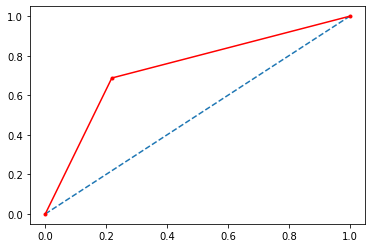

In [ ]:
k09=y.predict_proba(X_test)
k09=k09[:,1]
auc = roc_auc_score(y_test, y_predd)
a,b, _ = roc_curve(y_test,y_predd)
plt.plot([0,1],linestyle='--')
plt.plot(a,b,marker=".",color="red")

In [ ]:
gb2 = GradientBoostingClassifier(random_state=1, learning_rate=.01)
gb2.fit(X_train, y_train)
g_pred=gb2.predict(X_test)
accuracy_score(y_test,g_pred)

0.7532467532467533

In [ ]:

print(accuracy_score(y_test,g_pred))
print(precision_score(y_test,g_pred))
print(f1_score(y_test,g_pred))
print(recall_score(y_test,g_pred))
print(confusion_matrix(y_test,g_pred))

0.7532467532467533
0.7090909090909091
0.5777777777777778
0.4875
[[135  16]
 [ 41  39]]


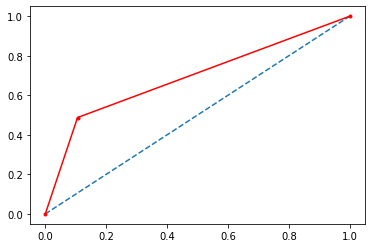

In [ ]:
k01=gb2.predict_proba(X_test)
k01=k01[:,1]
auc = roc_auc_score(y_test,g_pred)
a,b, _ = roc_curve(y_test,g_pred)
plt.plot([0,1],linestyle='--')
plt.plot(a,b,marker=".",color="red")

In [ ]:
xxx=XGBClassifier(learning_rate=0.1)
xxx.fit(X_train, y_train)
x_pred=xxx.predict(X_test)
accuracy_score(y_test,x_pred)

0.7575757575757576

In [ ]:

print(accuracy_score(y_test,x_pred))
print(precision_score(y_test,x_pred))
print(f1_score(y_test,x_pred))
print(recall_score(y_test,x_pred))
print(confusion_matrix(y_test,x_pred))


0.7575757575757576
0.6428571428571429
0.6585365853658537
0.675
[[121  30]
 [ 26  54]]


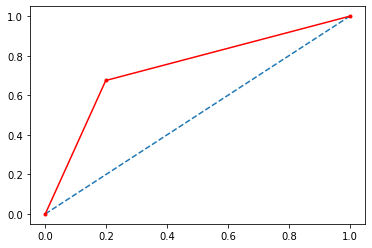

In [ ]:
k11=xxx.predict_proba(X_test)
k11=k11[:,1]
auc = roc_auc_score(y_test, x_pred)
a,b, _ = roc_curve(y_test,x_pred)
plt.plot([0,1],linestyle='--')
plt.plot(a,b,marker=".",color="red")

In [ ]:
c=CatBoostClassifier()
c.fit(X_train, y_train)
c_pred=c.predict(X_test)


Learning rate set to 0.0079
0:	learn: 0.6888022	total: 50.7ms	remaining: 50.7s
1:	learn: 0.6854405	total: 52.8ms	remaining: 26.4s
2:	learn: 0.6814562	total: 54.7ms	remaining: 18.2s
3:	learn: 0.6772260	total: 56.6ms	remaining: 14.1s
4:	learn: 0.6735682	total: 58.4ms	remaining: 11.6s
5:	learn: 0.6691453	total: 60.2ms	remaining: 9.98s
6:	learn: 0.6651250	total: 62.1ms	remaining: 8.81s
7:	learn: 0.6611411	total: 63.9ms	remaining: 7.92s
8:	learn: 0.6572583	total: 65.7ms	remaining: 7.24s
9:	learn: 0.6539432	total: 67.8ms	remaining: 6.71s
10:	learn: 0.6499762	total: 69.7ms	remaining: 6.27s
11:	learn: 0.6467257	total: 71.8ms	remaining: 5.91s
12:	learn: 0.6437182	total: 73.8ms	remaining: 5.6s
13:	learn: 0.6400363	total: 75.7ms	remaining: 5.33s
14:	learn: 0.6363863	total: 77.5ms	remaining: 5.09s
15:	learn: 0.6328755	total: 79.3ms	remaining: 4.87s
16:	learn: 0.6303323	total: 81.1ms	remaining: 4.69s
17:	learn: 0.6274747	total: 82.9ms	remaining: 4.52s
18:	learn: 0.6237465	total: 84.7ms	remaining: 4

In [ ]:

print(accuracy_score(y_test,c_pred))
print(precision_score(y_test,c_pred))
print(f1_score(y_test,c_pred))
print(recall_score(y_test,c_pred))
print(confusion_matrix(y_test,c_pred))

0.7532467532467533
0.6419753086419753
0.6459627329192547
0.65
[[122  29]
 [ 28  52]]


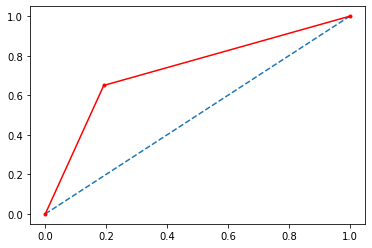

In [ ]:
kc=c.predict_proba(X_test)
kc=kc[:,1]
auc = roc_auc_score(y_test, c_pred)
a,b, _ = roc_curve(y_test,c_pred)
plt.plot([0,1],linestyle='--')
plt.plot(a,b,marker=".",color="red")

In [ ]:
from sklearn.model_selection import cross_val_score
accu=cross_val_score(estimator=model5,X=X_train,y=y_train,cv=10)
print('acc: {:.2f} %'.format(accu.mean()*100))
print('std: {:.2f} %'.format(accu.std()*100))

acc: 75.03 %
std: 5.40 %


In [ ]:

plt.rcParams["figure.figsize"] = (20,10)
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          
          ('GaussianNB', GaussianNB()),
          ('proposed model',model5),('adaboost',ttt),('baggingclassifier',y),('gradientboosting',gb2),('xgb',xxx),('catboost',c)]

In [ ]:
random_seed=12
for model_name, model in models:
    k_fold_validation = KFold(n_splits=10, random_state=random_seed)
    results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LogReg| Mean=0.780154 STD=0.054011
SVM| Mean=0.754158 STD=0.047560
DecTree| Mean=0.707303 STD=0.081443
KNN| Mean=0.730084 STD=0.041013
GaussianNB| Mean=0.746576 STD=0.052132


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


proposed model| Mean=0.750314 STD=0.054013


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


adaboost| Mean=0.778232 STD=0.063109


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


baggingclassifier| Mean=0.769113 STD=0.051372


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


gradientboosting| Mean=0.750384 STD=0.036005


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


xgb| Mean=0.767191 STD=0.053339
Learning rate set to 0.007551
0:	learn: 0.6884803	total: 2.19ms	remaining: 2.19s
1:	learn: 0.6853591	total: 4.07ms	remaining: 2.03s
2:	learn: 0.6809269	total: 5.79ms	remaining: 1.92s
3:	learn: 0.6772524	total: 7.42ms	remaining: 1.85s
4:	learn: 0.6740903	total: 9.06ms	remaining: 1.8s
5:	learn: 0.6701741	total: 10.7ms	remaining: 1.77s
6:	learn: 0.6665496	total: 12.4ms	remaining: 1.75s
7:	learn: 0.6629131	total: 14.1ms	remaining: 1.74s
8:	learn: 0.6590136	total: 15.7ms	remaining: 1.73s
9:	learn: 0.6560183	total: 17.4ms	remaining: 1.72s
10:	learn: 0.6523330	total: 19ms	remaining: 1.71s
11:	learn: 0.6492791	total: 20.7ms	remaining: 1.7s
12:	learn: 0.6456210	total: 22.3ms	remaining: 1.69s
13:	learn: 0.6419686	total: 23.9ms	remaining: 1.68s
14:	learn: 0.6385948	total: 25.6ms	remaining: 1.68s
15:	learn: 0.6358630	total: 27.2ms	remaining: 1.67s
16:	learn: 0.6325108	total: 28.9ms	remaining: 1.67s
17:	learn: 0.6293914	total: 30.5ms	remaining: 1.66s
18:	learn: 0.626

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Streaming output truncated to the last 5000 lines.
6:	learn: 0.6662704	total: 11.9ms	remaining: 1.69s
7:	learn: 0.6626066	total: 13.6ms	remaining: 1.69s
8:	learn: 0.6588445	total: 15.3ms	remaining: 1.68s
9:	learn: 0.6563894	total: 17ms	remaining: 1.69s
10:	learn: 0.6531836	total: 18.7ms	remaining: 1.68s
11:	learn: 0.6500782	total: 20.5ms	remaining: 1.68s
12:	learn: 0.6463944	total: 22.1ms	remaining: 1.68s
13:	learn: 0.6428438	total: 23.9ms	remaining: 1.68s
14:	learn: 0.6393156	total: 25.7ms	remaining: 1.69s
15:	learn: 0.6365879	total: 27.5ms	remaining: 1.69s
16:	learn: 0.6328971	total: 29.2ms	remaining: 1.69s
17:	learn: 0.6297548	total: 30.9ms	remaining: 1.68s
18:	learn: 0.6266361	total: 33ms	remaining: 1.71s
19:	learn: 0.6234378	total: 35.1ms	remaining: 1.72s
20:	learn: 0.6194947	total: 37.4ms	remaining: 1.74s
21:	learn: 0.6164657	total: 39.2ms	remaining: 1.74s
22:	learn: 0.6131082	total: 40.9ms	remaining: 1.74s
23:	learn: 0.6097673	total: 42.6ms	remaining: 1.73s
24:	learn: 0.6074159	

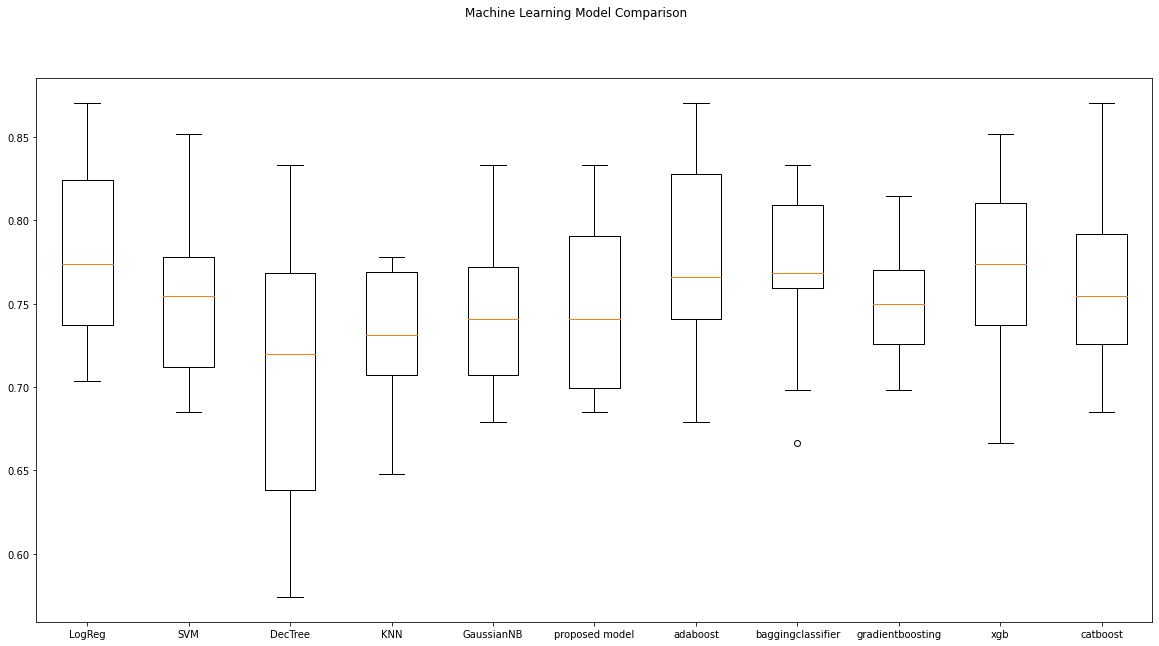

In [ ]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

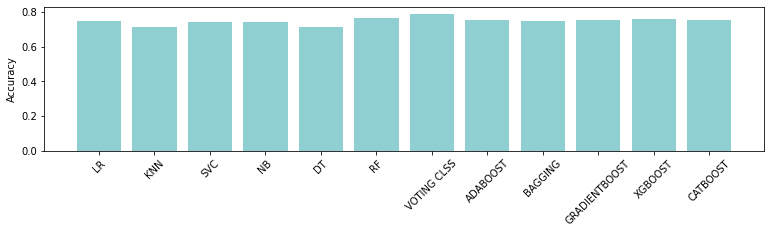

In [ ]:
fig = plt.figure(figsize=(10,2))
ax = fig.add_axes([0,0,1,1])
langs = ['LR', 'KNN','SVC','NB','DT','RF','VOTING CLSS','ADABOOST','BAGGING','GRADIENTBOOST','XGBOOST','CATBOOST']
students = [
0.7489177489177489,
0.7142857142857143,
0.7402597402597403,
0.7401870345678909,
0.7142857142857143,
0.764417748917749,
0.7889666666666645,
0.7532467532467533,
0.7489177489177489,
0.7532467532467533,0.757575757577575,0.7532467532467533]
height=.8

ax.bar(langs,students,height,color='#8fcfd1')
ax.set_ylabel('Accuracy')

plt.xticks(rotation=45)
plt.show()

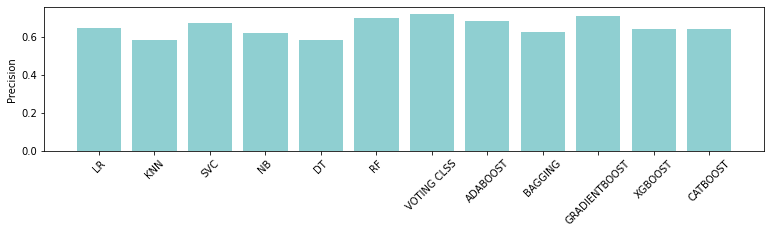

In [ ]:
fig = plt.figure(figsize=(10,2))
px = fig.add_axes([0,0,1,1])
l =  ['LR', 'KNN','SVC','NB','DT','RF','VOTING CLSS','ADABOOST','BAGGING','GRADIENTBOOST','XGBOOST','CATBOOST']

s = [0.6447368421052632,
0.5833333333333334,
0.6724137931034483,
0.6190476190476191,
0.5813953488372093,
0.699912121212122,
0.721358024691358,
0.6825396825396826,
0.6257878787878787,
0.7090909090909091,
0.6428571428571429,
0.6419753086419753]
height=.8

px.bar(l,s,height,color='#8fcfd1')
px.set_ylabel('Precision')

plt.xticks(rotation=45)
plt.show()

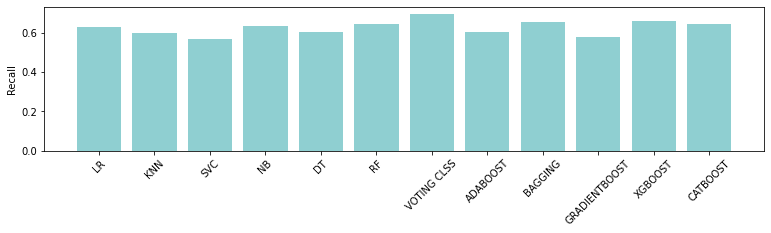

In [ ]:
fig = plt.figure(figsize=(10,2))
px = fig.add_axes([0,0,1,1])
l =  ['LR', 'KNN','SVC','NB','DT','RF','VOTING CLSS','ADABOOST','BAGGING','GRADIENTBOOST','XGBOOST','CATBOOST']

s = [
0.6282051282051283,


0.5975609756097562,


0.5652173913043478,

0.6341463414634146,


0.6024096385542168,


0.6438356164383561,
0.6956521739130435,


0.6013986013986015,


0.6547619047619048,


0.5777777777777778,
0.6585365853658537,
0.6459627329192547,
]
height=.8

px.bar(l,s,height,color='#8fcfd1')
px.set_ylabel('Recall')

plt.xticks(rotation=45)
plt.show()

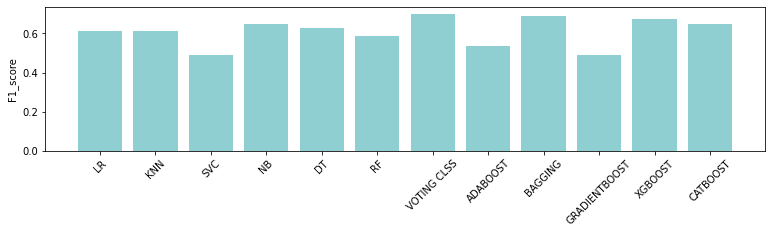

In [ ]:
fig = plt.figure(figsize=(10,2))
px = fig.add_axes([0,0,1,1])
l =  ['LR', 'KNN','SVC','NB','DT','RF','VOTING CLSS','ADABOOST','BAGGING','GRADIENTBOOST','XGBOOST','CATBOOST']

s = [
0.6125,
0.6125,
0.4875,
0.65,
0.625,
0.5875,


0.7,
0.5375,
0.6875,
0.4875,
0.675,


0.65


]
height=.8

px.bar(l,s,height,color='#8fcfd1')
px.set_ylabel('F1_score')
plt.xticks(rotation=45)
plt.show()

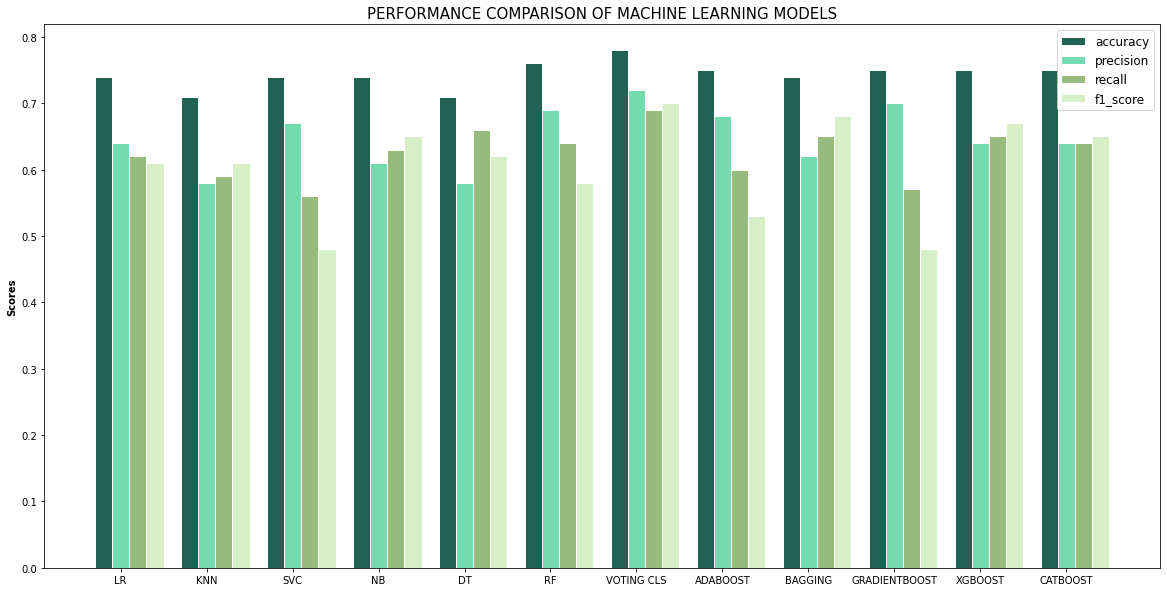

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = .20
 
# set height of bar
bars1 = [0.74,0.71,0.74,0.74,0.71,0.76,0.78,0.75,0.74,0.75,0.75,0.75]
bars2 = [0.64,0.58,0.67,0.61,0.58,0.69,0.72,0.68,0.62,0.70,0.64,0.64]
bars3 = [0.62,0.59,0.56,0.63,0.66,0.64,0.69,0.60,0.65,0.57,0.65,0.64]
bars4 = [0.61,0.61,0.48,0.65,0.62,0.58,0.70,0.53,0.68,0.48,0.67,0.65]
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='#216353', width=barWidth, edgecolor='white', label='accuracy')
plt.bar(r2, bars2, color='#75daad', width=barWidth, edgecolor='white', label='precision')
plt.bar(r3, bars3, color='#96bb7c', width=barWidth, edgecolor='white', label='recall')
plt.bar(r4, bars4, color='#d6efc7', width=barWidth, edgecolor='white', label='f1_score') 
# Add xticks on the middle of the group bars
plt.title("PERFORMANCE COMPARISON OF MACHINE LEARNING MODELS",fontsize=15)
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['LR', 'KNN','SVC','NB','DT','RF','VOTING CLS','ADABOOST','BAGGING','GRADIENTBOOST','XGBOOST','CATBOOST']
)
#plt.xticks(rotation=45)
 
# Create legend & Show graphic

current_handles, current_labels = plt.gca().get_legend_handles_labels()

plt.legend(fontsize=12)
plt.show()


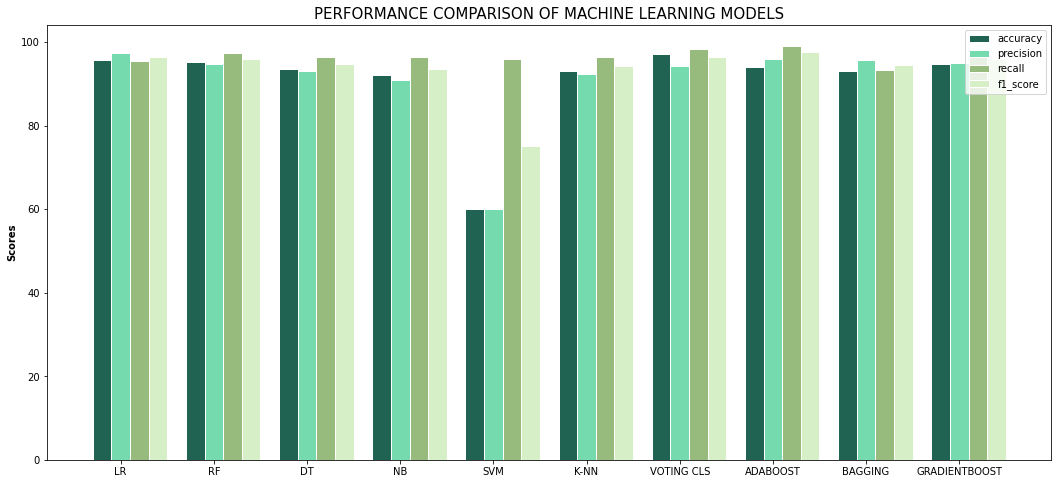

In [ ]:
barWidth = .20
plt.figure(figsize=(18,8))
 
# set height of bar
bars1 = [95.74,95.21,93.61,92.02,60.10,93.08,97.27,94.10,93.08,94.68]
bars2 = [97.29,94.82,93.16,90.83,60.10,92.37,94.40,95.96,95.72,95.08]
bars3 = [95.57,97.34,96.46,96.46,96.00,96.46,98.33,99.16,93.33,96.66]
bars4 = [96.42,96.06,94.78,93.56,75.08,94.37,96.32,97.54,94.51,95.86]
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='#216353', width=barWidth, edgecolor='white', label='accuracy')
plt.bar(r2, bars2, color='#75daad', width=barWidth, edgecolor='white', label='precision')
plt.bar(r3, bars3, color='#96bb7c', width=barWidth, edgecolor='white', label='recall')
plt.bar(r4, bars4, color='#d6efc7', width=barWidth, edgecolor='white', label='f1_score') 
# Add xticks on the middle of the group bars
plt.title("PERFORMANCE COMPARISON OF MACHINE LEARNING MODELS",fontsize=15)
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['LR','RF','DT','NB','SVM','K-NN','VOTING CLS','ADABOOST','BAGGING','GRADIENTBOOST'])
#plt.xticks(rotation=45)
 
# Create legend & Show graphic



plt.legend(fontsize=10)
plt.show()

In [ ]:
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(),
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),XGBClassifier(),
               RandomForestClassifier(random_state=1234),CatBoostClassifier(),AdaBoostClassifier( random_state=1),GradientBoostingClassifier(random_state=2),
               BaggingClassifier(random_state=24),VotingClassifier(estimators=[('rf',model4),('nb',model3)], voting='soft')]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Learning rate set to 0.0079
0:	learn: 0.6888022	total: 1.81ms	remaining: 1.81s
1:	learn: 0.6854405	total: 3.56ms	remaining: 1.78s
2:	learn: 0.6814562	total: 5.29ms	remaining: 1.76s
3:	learn: 0.6772260	total: 6.96ms	remaining: 1.73s
4:	learn: 0.6735682	total: 8.62ms	remaining: 1.72s
5:	learn: 0.6691453	total: 10.3ms	remaining: 1.7s
6:	learn: 0.6651250	total: 11.9ms	remaining: 1.69s
7:	learn: 0.6611411	total: 13.6ms	remaining: 1.68s
8:	learn: 0.6572583	total: 15.2ms	remaining: 1.68s
9:	learn: 0.6539432	total: 16.9ms	remaining: 1.67s
10:	learn: 0.6499762	total: 18.5ms	remaining: 1.67s
11:	learn: 0.6467257	total: 20.3ms	remaining: 1.67s
12:	learn: 0.6437182	total: 22.2ms	remaining: 1.69s
13:	learn: 0.6400363	total: 24ms	remaining: 1.69s
14:	learn: 0.6363863	total: 25.7ms	remaining: 1.69s
15:	learn: 0.6328755	total: 27.4ms	remaining: 1.68s
16:	learn: 0.6303323	total: 29.1ms	remaining: 1.68s
17:	learn: 0.6274747	total: 30.8ms	remaining: 1.68s
18:	learn: 0.6237465	total: 32.6ms	remaining: 1.6

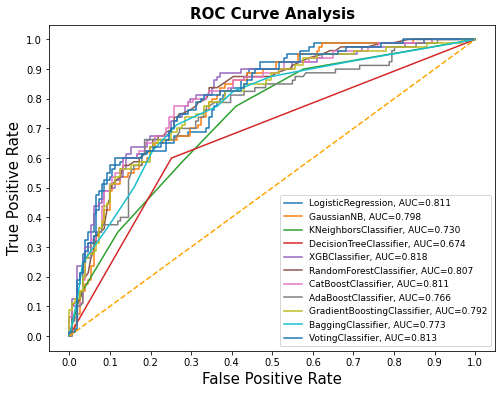

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':9}, loc='lower right')

plt.show()

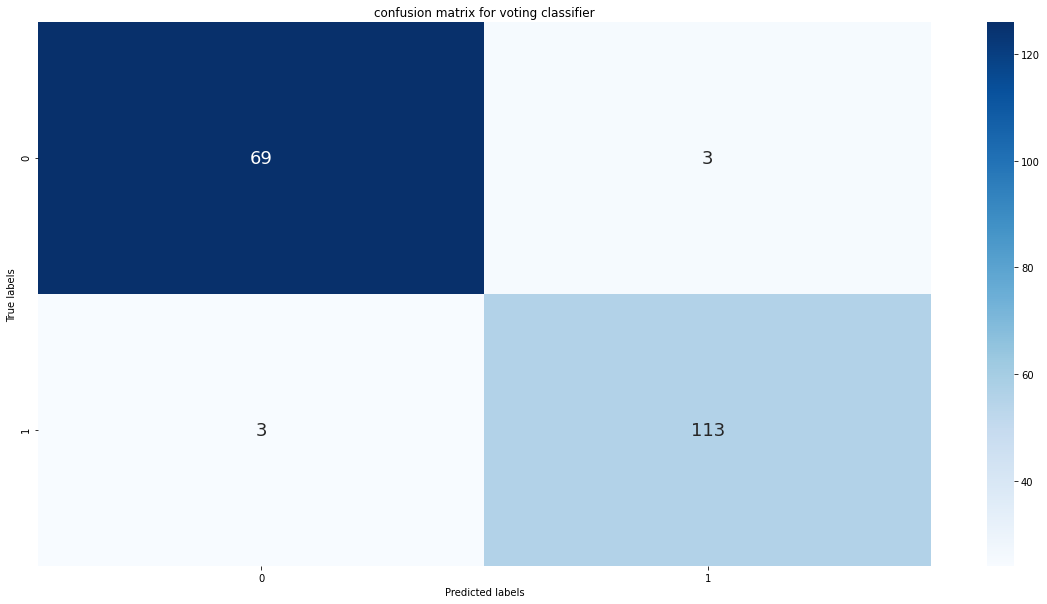

In [ ]:

p=confusion_matrix(y_test,y_pred6)
labels = ['69','3','3','113']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(p,annot=labels,annot_kws={"size":18}, fmt="", cmap='Blues')

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("confusion matrix for voting classifier")
plt.show()